In [313]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [314]:
import sys
sys.path.insert(0, '../src')

In [315]:
! pip install -i https://test.pypi.org/simple/ my-krml_14229898==0.2.7

Looking in indexes: https://test.pypi.org/simple/
  Obtaining dependency information for my-krml_14229898==0.2.7 from https://test-files.pythonhosted.org/packages/ea/3c/5199887195ae0b2c134bcc72ebaa5dc8b57d2e5490d46f2f56cd6570f211/my_krml_14229898-0.2.7-py3-none-any.whl.metadata
  Attempting uninstall: my-krml_14229898
    Found existing installation: my-krml-14229898 0.2.6
    Uninstalling my-krml-14229898-0.2.6:
      Successfully uninstalled my-krml-14229898-0.2.6


# Applying CRIPS-DM Methodology to a Business Problem

## Dataset 2 - Predicting Customer Churn in the Telecomunication Provider

### 3. Modeling

#### 3.1 Logistic Regression Model

**[3.1]** Import the pandas and numpy packages

In [316]:
import pandas as pd
import numpy as np

**[3.2]** Import the `load_sets` from my custom package

#### 1. Load the datset

In [317]:
from my_krml_14229898.data.sets import load_sets_smote, load_sets

**[3.3]** Load the SMOTE saved sets from `data/processed`

In [318]:
X_train_resampled, y_train_resampled = load_sets_smote(path='../data/processed/')

**[3.4]** Load the `validating` and `testing` sets from `data/processed`

In [319]:
X_train, y_train, X_val, y_val, X_test, y_test = load_sets('../data/processed/')

#### 2. Train Logistic Regression Model

**[3.5]** Import the Logistic Regression package

In [320]:
from sklearn.linear_model import LogisticRegression

**[3.6]** Instantiate a `LogisticRegression` class

In [321]:
log_reg = LogisticRegression(random_state=8, max_iter=5000)

**[3.7]** Import `fit_asses_classifier` function from the customer package

In [322]:
from my_krml_14229898.models.performance import fit_assess_classifier

**[3.8]** Set the performance metrics to be used for the model.

In [323]:
metrics = ['precision', 'recall', 'f1', 'roc_auc']

**[3.9]** Fit the model and display the performance on training and validation sets.

In [324]:
log_reg = fit_assess_classifier(log_reg, X_train_resampled, y_train_resampled, X_val, y_val, metrics=metrics)

               f1  precision    recall   roc_auc
Training  0.84668   0.852507  0.840931  0.847721
                  f1  precision    recall   roc_auc
Validation  0.626444   0.628866  0.624041  0.741154


**[4.0]** Import `plot_confusion_matrix`, `plot_roc_auc_curve`, and `permutation_importance` from the custom package

In [325]:
from my_krml_14229898.models.performance import plot_confusion_matrix, plot_roc_auc_curve, permutation_importance

**[4.1]** Plot the Confusion Matrix of Traning and Validation set

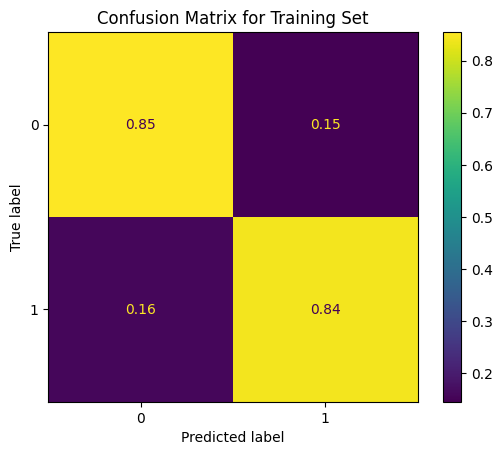

In [326]:
plot_confusion_matrix(log_reg, X_train_resampled, y_train_resampled, "Training")

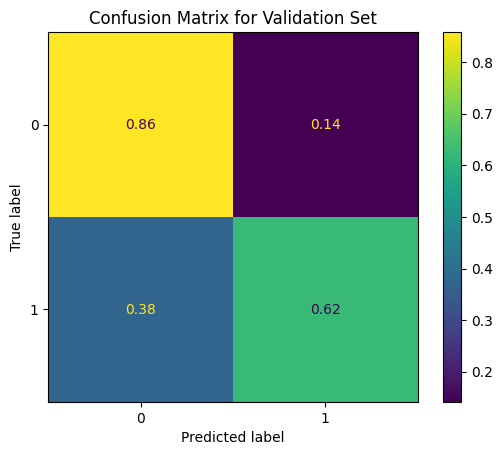

In [327]:
plot_confusion_matrix(log_reg, X_val, y_val, "Validation")

**[4.2]** Plot the ROC-AUC Curve of Validation set

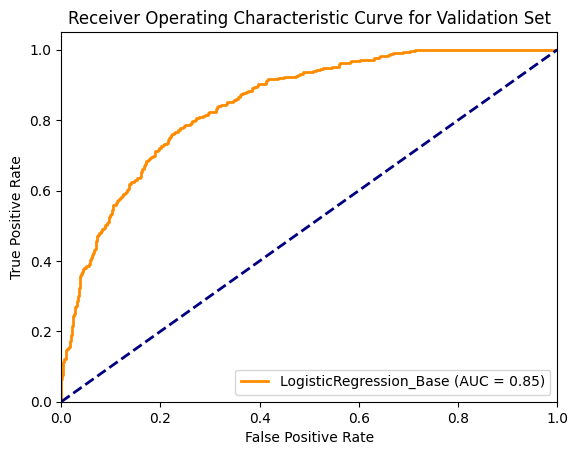

In [328]:
plot_roc_auc_curve(log_reg, X_val, y_val, "Validation", "LogisticRegression_Base")

**[4.3]** Display the Permutations Importance

In [331]:
df = pd.read_csv("../data/processed/df_cleaned.csv")
target = "Churn"

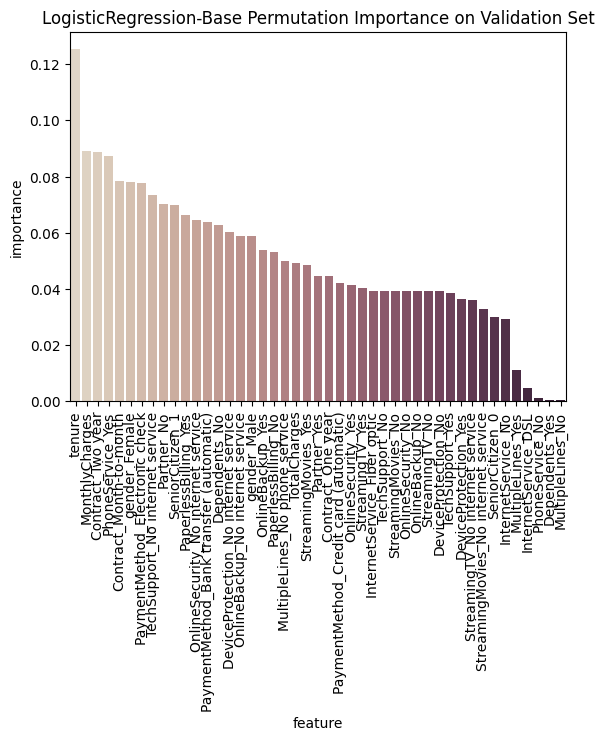

In [333]:
log_permu = permutation_importance(df, target, log_reg, X_val, y_val, "Validation", "LogisticRegression-Base")

In [334]:
log_permu

,feature,importance
0,tenure,0.125207
1,MonthlyCharges,0.089149
2,Contract_Two year,0.088605
3,PhoneService_Yes,0.087444
4,Contract_Month-to-month,0.078299
5,gender_Female,0.078157
6,PaymentMethod_Electronic check,0.077541
7,TechSupport_No internet service,0.073584
8,Partner_No,0.070102
9,SeniorCitizen_1,0.070031


**[4.4]** Import `dump` from `joblib` and save the fitted model into the folder `models` as a file called `logistic-regression.joblib`

In [335]:
from joblib import dump

dump(log_reg, '../models/logistic-regression.joblib')

['../models/logistic-regression.joblib']

#### 3. Hyperparameter tuning with Hyperopt

**[4.5]** Import Trials, STATUS_OK, tpe, hp, fmin from hyperopt package

In [261]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
rstate = np.random.default_rng(42)

**[4.6]** Define the search space for logistic regression hyperparameters


In [262]:
space = {
    'C': hp.loguniform('C', -5, 2),
    'penalty': hp.choice('penalty', ['l2', None]),
    'max_iter': hp.quniform('max_iter', 100, 5000, 1),
    'solver': hp.choice('solver', ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']),
    'fit_intercept': hp.choice('fit_intercept', [True, False])
}

In [263]:
def objective(space):
    from sklearn.model_selection import cross_val_score
    
    log_reg = LogisticRegression(
        C=float(space['C']),
        penalty=space['penalty'],
        max_iter=int(space['max_iter']),
        solver=space['solver'],
        fit_intercept=space['fit_intercept'],
    )
    
    acc = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=5, scoring='recall').mean()
    
    return {'loss': -acc,'status': STATUS_OK}

In [264]:
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    rstate=rstate,
)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

  1%|          | 1/100 [00:02<03:45,  2.28s/trial, best loss: -0.7995383513444275]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



  4%|▍         | 4/100 [00:03<01:10,  1.37trial/s, best loss: -0.8208698652696957]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

  5%|▌         | 5/100 [00:08<03:30,  2.21s/trial, best loss: -0.8208698652696957]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converg

  6%|▌         | 6/100 [00:14<05:20,  3.41s/trial, best loss: -0.8208698652696957]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters


  8%|▊         | 8/100 [00:22<05:07,  3.34s/trial, best loss: -0.8296004098896331]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 11%|█         | 11/100 [00:26<03:00,  2.03s/trial, best loss: -0.8296004098896331]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 15%|█▌        | 15/100 [00:36<02:19,  1.65s/trial, best loss: -0.8296004098896331]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 16%|█▌        | 16/100 [00:38<02:14,  1.60s/trial, best loss: -0.8296004098896331]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 34%|███▍      | 34/100 [01:00<01:07,  1.02s/trial, best loss: -0.8302445221701147]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 37%|███▋      | 37/100 [01:09<01:55,  1.84s/trial, best loss: -0.8302445221701147]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 39%|███▉      | 39/100 [01:17<02:37,  2.59s/trial, best loss: -0.8302445221701147]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 42%|████▏     | 42/100 [01:19<01:09,  1.20s/trial, best loss: -0.8302445221701147]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 45%|████▌     | 45/100 [01:23<01:04,  1.18s/trial, best loss: -0.8302445221701147]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.81556e-35): result may not be accurate.
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/

 48%|████▊     | 48/100 [01:25<00:40,  1.29trial/s, best loss: -0.8302466134437527]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 52%|█████▏    | 52/100 [01:33<00:53,  1.11s/trial, best loss: -0.8302466134437527]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 56%|█████▌    | 56/100 [01:42<00:57,  1.31s/trial, best loss: -0.8302466134437527]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converg

 57%|█████▋    | 57/100 [01:43<00:53,  1.25s/trial, best loss: -0.8302466134437527]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 61%|██████    | 61/100 [01:45<00:30,  1.29trial/s, best loss: -0.8302466134437527]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 78%|███████▊  | 78/100 [02:03<00:14,  1.56trial/s, best loss: -0.8305691924024028]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 82%|████████▏ | 82/100 [02:12<00:23,  1.31s/trial, best loss: -0.8305691924024028]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  

 87%|████████▋ | 87/100 [02:21<00:12,  1.06trial/s, best loss: -0.8305697152208124]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=3.8421e-36): result may not be accurate.
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.

 92%|█████████▏| 92/100 [02:23<00:03,  2.43trial/s, best loss: -0.8305697152208124]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.81556e-35): result may not be accurate.
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/

 93%|█████████▎| 93/100 [02:23<00:03,  2.08trial/s, best loss: -0.8305697152208124]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.23562e-36): result may not be accurate.
  warnings.warn(



 96%|█████████▌| 96/100 [02:24<00:00,  4.06trial/s, best loss: -0.8305697152208124]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=3.8421e-36): result may not be accurate.
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.

 97%|█████████▋| 97/100 [02:24<00:01,  2.70trial/s, best loss: -0.8305697152208124]

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(

/Users/narongvatchingpayakmon/Projects/Spring2023/internship_c/internship_c_dataset_2/.venv/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.96332e-36): result may not be accurate.
  warnings.warn(



100%|██████████| 100/100 [02:25<00:00,  1.46s/trial, best loss: -0.8305697152208124]


In [265]:
print("Best parameters: ", best)

Best parameters:  {'C': 0.07619891601845721, 'fit_intercept': 0, 'max_iter': 1701.0, 'penalty': 0, 'solver': 2}


In [336]:
best

{'C': 0.07619891601845721,
 'fit_intercept': 0,
 'max_iter': 1701.0,
 'penalty': 0,
 'solver': 2}

In [277]:
log_reg2 = LogisticRegression(
    C=best['C'],
    penalty='l2',
    max_iter=1701,
    solver = 'saga',
    fit_intercept= True
)

In [337]:
log_reg2 = fit_assess_classifier(log_reg2, X_train_resampled, y_train_resampled, X_val, y_val, metrics)

                f1  precision    recall   roc_auc
Training  0.839172   0.826796  0.851924  0.836728
                  f1  precision    recall   roc_auc
Validation  0.644028   0.593952  0.703325  0.759143


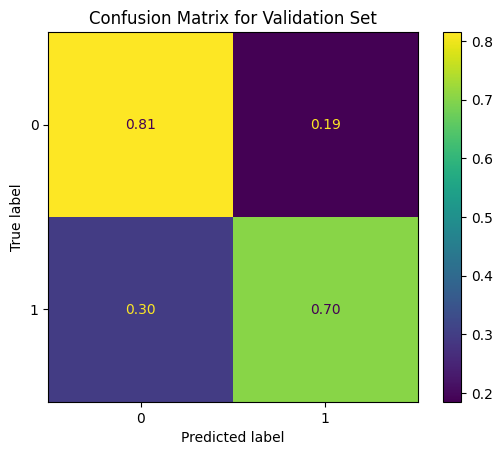

In [338]:
plot_confusion_matrix(log_reg2, X_val, y_val, "Validation")

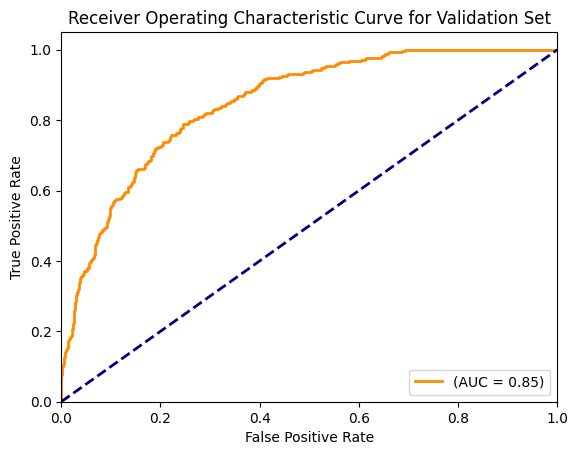

In [339]:
plot_roc_auc_curve(log_reg2, X_val, y_val, "Validation")

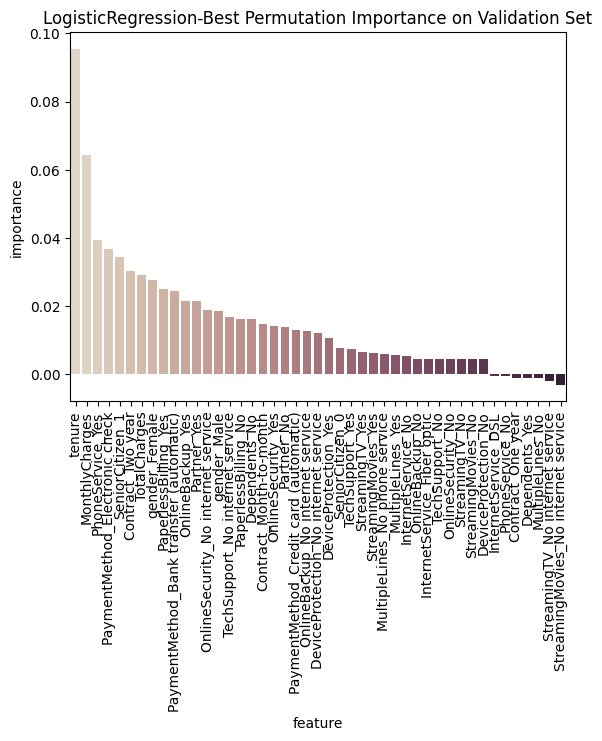

In [342]:
log_best_permu = permutation_importance(df, target, log_reg2, X_val, y_val, "Validation", "LogisticRegression-Best")